# Predictive Policing: A Data-Driven Approach to Crime Analysis

### Team Member 1: Tarun Reddi 
### Team Member 2: Charvi Kusuma

### Problem Statement:

Understanding the importance of analyzing crime data involves acknowledging the multifaceted challenges it can address. It is the initial step towards realizing the full potential of crime data analysis:

1. **Prioritizing Public Safety:** A paramount concern is safeguarding the well-being and security of individuals and communities. Analyzing crime data aids in identifying areas with elevated crime rates, thereby enabling law enforcement to allocate their resources with precision, thus making our communities safer.
2. **Efficient Resource Allocation:** Law enforcement agencies operate under resource constraints. Crime data analysis serves as a guiding compass for allocating these limited resources to areas where they are most urgently needed. This results in reduced response times and increased overall operational efficiency.
3. **Rooting Out Crime Causes:** Delving into historical crime patterns and their contributing factors, crime data analysis unravels invaluable insights into the origins of criminal activities. Unearthing these underlying causes forms the bedrock for crafting effective crime prevention strategies.
4. **Adapting to Emerging Trends:** The world of crime constantly evolves, with new trends and tactics emerging regularly. The analytical examination of crime data fosters a deeper understanding of criminal behaviors and modus operandi, empowering law enforcement to respond adeptly.
5. **Optimizing Resource Efficiency:** The efficiency of resource utilization is a universal challenge. Crime data analysis helps identify and rectify inefficiencies and overlaps in resource allocation, ensuring that every resource is put to its most effective use.

Import Required Libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud

Read Data

In [98]:
crimeDF = pd.read_csv("Crime_Data_from_2020_to_Present.csv")
crimeDF

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811658,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
811659,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
811660,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
811661,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485


## Data Cleaning

**1) Statistics of data**

In [99]:
crimeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811663 entries, 0 to 811662
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           811663 non-null  int64  
 1   Date Rptd       811663 non-null  object 
 2   DATE OCC        811663 non-null  object 
 3   TIME OCC        811663 non-null  int64  
 4   AREA            811663 non-null  int64  
 5   AREA NAME       811663 non-null  object 
 6   Rpt Dist No     811663 non-null  int64  
 7   Part 1-2        811663 non-null  int64  
 8   Crm Cd          811663 non-null  int64  
 9   Crm Cd Desc     811663 non-null  object 
 10  Mocodes         699639 non-null  object 
 11  Vict Age        811663 non-null  int64  
 12  Vict Sex        705139 non-null  object 
 13  Vict Descent    705131 non-null  object 
 14  Premis Cd       811654 non-null  float64
 15  Premis Desc     811184 non-null  object 
 16  Weapon Used Cd  282783 non-null  float64
 17  Weapon Des

We get insights into different columns and their data types and the size of data

In [100]:
crimeDF.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,8.116630e+05,811663.000000,811663.000000,811663.000000,811663.000000,811663.000000,811663.000000,811654.000000,282783.000000,811653.000000,59815.000000,2000.000000,60.000000,811663.000000,811663.000000
mean,2.159652e+08,1335.588916,10.712678,1117.690694,1.413998,500.745704,29.828150,305.789181,362.905429,500.483809,957.470099,983.554000,990.766667,33.978513,-118.024077
std,1.077479e+07,654.136069,6.092110,609.205985,0.492548,207.814959,21.769578,216.625659,123.741738,207.603529,111.587116,52.917211,27.912919,1.800082,6.241544
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-3.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.000000,0.000000,-118.667600
25%,2.101207e+08,900.000000,6.000000,622.000000,1.000000,331.000000,8.000000,101.000000,310.000000,331.000000,998.000000,998.000000,998.000000,34.013600,-118.429600
50%,2.201116e+08,1415.000000,11.000000,1142.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058400,-118.321500
75%,2.219102e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163100,-118.273900
max,2.399165e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


All the below values prior to data cleaning:

    Count: The number of non-null values in each column.
    Mean: The average value of each column.
    Std (Standard Deviation): A measure of the spread or dispersion of the data.
    Min: The minimum value in each column.
    25%: The 25th percentile value (the value below which 25% of the data falls).
    50% (median): The median value (the middle value when the data is sorted).
    75%: The 75th percentile value (the value below which 75% of the data falls).
    Max: The maximum value in each column.

In [101]:
crimeDF.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           112024
Vict Age               0
Vict Sex          106524
Vict Descent      106532
Premis Cd              9
Premis Desc          479
Weapon Used Cd    528880
Weapon Desc       528880
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          751848
Crm Cd 3          809663
Crm Cd 4          811603
LOCATION               0
Cross Street      681791
LAT                    0
LON                    0
dtype: int64

We can notice the number of null values for every column

In [102]:
crimeDF.nunique()

DR_NO             811663
Date Rptd           1371
DATE OCC            1371
TIME OCC            1439
AREA                  21
AREA NAME             21
Rpt Dist No         1204
Part 1-2               2
Crm Cd               138
Crm Cd Desc          138
Mocodes           271218
Vict Age             103
Vict Sex               5
Vict Descent          20
Premis Cd            313
Premis Desc          306
Weapon Used Cd        79
Weapon Desc           79
Status                 6
Status Desc            6
Crm Cd 1             140
Crm Cd 2             122
Crm Cd 3              37
Crm Cd 4               6
LOCATION           63575
Cross Street        9649
LAT                 5399
LON                 4970
dtype: int64

How many unique values present for each column. We can see which has higher number of variables.?

- In our case DR_NO has as many values as the number of rows, which is not useful for our training purposes.

In [103]:
crimeDF.shape

(811663, 28)

Shape gave us the number of rows, columns

**2) Dropping unnecessary columns**

Lets drop DR_NO as there unique values size of the data, and Mocodes as it has more than half null values.

In [104]:
crimeDF.drop(columns=['DR_NO','Mocodes'],inplace=True)

drop() function is useful to delete particular columns.

In [105]:
columns_to_drop = ["Weapon Used Cd", "Weapon Desc",  "Crm Cd 2", "Crm Cd 3", "Crm Cd 4", "Cross Street"]
crimeDF.drop(columns=columns_to_drop, inplace=True)

There are many null values in the above columns we drop this data column and utilize rest of the available data.

**3) Handling Missing Values**

In [106]:
for col in crimeDF.columns:
    uniValues =crimeDF[col].unique()
    print(f"Unique values in '{col}':")
    print(uniValues)
    print("\n")

Unique values in 'Date Rptd':
['01/08/2020 12:00:00 AM' '01/02/2020 12:00:00 AM'
 '04/14/2020 12:00:00 AM' ... '09/03/2023 12:00:00 AM'
 '07/04/2023 12:00:00 AM' '07/09/2023 12:00:00 AM']


Unique values in 'DATE OCC':
['01/08/2020 12:00:00 AM' '01/01/2020 12:00:00 AM'
 '02/13/2020 12:00:00 AM' ... '09/28/2023 12:00:00 AM'
 '09/21/2023 12:00:00 AM' '03/16/2023 12:00:00 AM']


Unique values in 'TIME OCC':
[2230  330 1200 ...  559  818  841]


Unique values in 'AREA':
[ 3  1 15 19 17 11  5  9 10  8  7 14  2 12  4 18  6 13 16 20 21]


Unique values in 'AREA NAME':
['Southwest' 'Central' 'N Hollywood' 'Mission' 'Devonshire' 'Northeast'
 'Harbor' 'Van Nuys' 'West Valley' 'West LA' 'Wilshire' 'Pacific'
 'Rampart' '77th Street' 'Hollenbeck' 'Southeast' 'Hollywood' 'Newton'
 'Foothill' 'Olympic' 'Topanga']




Unique values in 'Rpt Dist No':
[ 377  163  155 ... 1013  995 1046]


Unique values in 'Part 1-2':
[2 1]


Unique values in 'Crm Cd':
[624 845 745 740 121 442 946 341 330 930 648 626 440 354 210 230 310 510
 420 761 236 662 350 860 480 623 956 900 888 331 901 886 421 647 940 810
 922 812 220 625 755 649 815 251 320 890 351 850 820 668 902 664 920 343
 437 753 928 910 760 762 661 821 237 903 813 666 627 805 763 441 122 443
 450 520 434 410 352 670 951 660 654 250 110 652 933 950 231 345 822 814
 932 622 471 235 470 921 906 433 651 806 943 653 436 949 446 113 487 438
 451 439 485 944 954 756 942 473 347 435 880 444 475 474 931 865 349 353
 452 870 522 924 840 948 884 904 830 432 882 445]


Unique values in 'Crm Cd Desc':
['BATTERY - SIMPLE ASSAULT' 'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE'
 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)'
 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)'
 'RAPE, FORCIBLE' 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)'
 'OTHER MISCELLANEOUS CRIME'
 'THEF

unique() function gives us the unique values list in each column.

In [107]:
crimeDF.isna().sum()

Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA                 0
AREA NAME            0
Rpt Dist No          0
Part 1-2             0
Crm Cd               0
Crm Cd Desc          0
Vict Age             0
Vict Sex        106524
Vict Descent    106532
Premis Cd            9
Premis Desc        479
Status               0
Status Desc          0
Crm Cd 1            10
LOCATION             0
LAT                  0
LON                  0
dtype: int64

After dropping some columns we still have null values in sex, age, premise code description and crime code.

In [108]:
crimeDF.shape

(811663, 20)

Filling object type columns with mode and numeric columns with mean

In [109]:
crimeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811663 entries, 0 to 811662
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date Rptd     811663 non-null  object 
 1   DATE OCC      811663 non-null  object 
 2   TIME OCC      811663 non-null  int64  
 3   AREA          811663 non-null  int64  
 4   AREA NAME     811663 non-null  object 
 5   Rpt Dist No   811663 non-null  int64  
 6   Part 1-2      811663 non-null  int64  
 7   Crm Cd        811663 non-null  int64  
 8   Crm Cd Desc   811663 non-null  object 
 9   Vict Age      811663 non-null  int64  
 10  Vict Sex      705139 non-null  object 
 11  Vict Descent  705131 non-null  object 
 12  Premis Cd     811654 non-null  float64
 13  Premis Desc   811184 non-null  object 
 14  Status        811663 non-null  object 
 15  Status Desc   811663 non-null  object 
 16  Crm Cd 1      811653 non-null  float64
 17  LOCATION      811663 non-null  object 
 18  LAT 

We handle numeric column null values and the categorical column values separately.

In [110]:
numericalcolumns = ["Premis Cd", "Crm Cd 1"]
crimeDF[numericalcolumns] = crimeDF[numericalcolumns].fillna(crimeDF[numericalcolumns].mean())


In [111]:
objectcolumns = ["Vict Sex", "Vict Descent", "Premis Desc"]
crimeDF[objectcolumns] = crimeDF[objectcolumns].fillna(crimeDF[objectcolumns].mode().iloc[0])

In [112]:
crimeDF.nunique()

Date Rptd        1371
DATE OCC         1371
TIME OCC         1439
AREA               21
AREA NAME          21
Rpt Dist No      1204
Part 1-2            2
Crm Cd            138
Crm Cd Desc       138
Vict Age          103
Vict Sex            5
Vict Descent       20
Premis Cd         314
Premis Desc       306
Status              6
Status Desc         6
Crm Cd 1          141
LOCATION        63575
LAT              5399
LON              4970
dtype: int64

In [113]:
crimeDF

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978
1,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545
2,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474
3,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019
4,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811658,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,122.0,"VEHICLE, PASSENGER/TRUCK",IC,Invest Cont,740.0,12500 BRANFORD ST,34.2466,-118.4054
811659,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,102.0,SIDEWALK,IC,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116
811660,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,222.0,LAUNDROMAT,IC,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915
811661,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,24,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485


**4) Handling Duplicates**

In [114]:
object_columns = crimeDF.select_dtypes(include=['object']).columns

for col in object_columns:
    crimeDF[col] = crimeDF[col].str.lower()

In [115]:
duplicate_count = crimeDF.duplicated().sum()
duplicate_count

3341

As we can see there are several duplicate columns hence we remove them.

In [116]:
crimeDF.drop_duplicates(inplace=True)
crimeDF

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,01/08/2020 12:00:00 am,01/08/2020 12:00:00 am,2230,3,southwest,377,2,624,battery - simple assault,36,f,b,501.0,single family dwelling,ao,adult other,624.0,1100 w 39th pl,34.0141,-118.2978
1,01/02/2020 12:00:00 am,01/01/2020 12:00:00 am,330,1,central,163,2,624,battery - simple assault,25,m,h,102.0,sidewalk,ic,invest cont,624.0,700 s hill st,34.0459,-118.2545
2,04/14/2020 12:00:00 am,02/13/2020 12:00:00 am,1200,1,central,155,2,845,sex offender registrant out of compliance,0,x,x,726.0,police facility,aa,adult arrest,845.0,200 e 6th st,34.0448,-118.2474
3,01/01/2020 12:00:00 am,01/01/2020 12:00:00 am,1730,15,n hollywood,1543,2,745,vandalism - misdeameanor ($399 or under),76,f,w,502.0,"multi-unit dwelling (apartment, duplex, etc)",ic,invest cont,745.0,5400 corteen pl,34.1685,-118.4019
4,01/01/2020 12:00:00 am,01/01/2020 12:00:00 am,415,19,mission,1998,2,740,"vandalism - felony ($400 & over, all church va...",31,x,x,409.0,beauty supply store,ic,invest cont,740.0,14400 titus st,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811658,01/27/2023 12:00:00 am,01/26/2023 12:00:00 am,1800,16,foothill,1663,2,740,"vandalism - felony ($400 & over, all church va...",23,m,h,122.0,"vehicle, passenger/truck",ic,invest cont,740.0,12500 branford st,34.2466,-118.4054
811659,03/22/2023 12:00:00 am,03/22/2023 12:00:00 am,1000,16,foothill,1602,1,230,"assault with deadly weapon, aggravated assault",25,f,h,102.0,sidewalk,ic,invest cont,230.0,12800 filmore st,34.2790,-118.4116
811660,04/12/2023 12:00:00 am,04/12/2023 12:00:00 am,1630,12,77th street,1239,1,230,"assault with deadly weapon, aggravated assault",29,m,b,222.0,laundromat,ic,invest cont,230.0,6100 s vermont av,33.9841,-118.2915
811661,07/02/2023 12:00:00 am,07/01/2023 12:00:00 am,1,1,central,154,1,352,pickpocket,24,f,h,735.0,night club (open evenings only),ic,invest cont,352.0,500 s main st,34.0467,-118.2485


In [117]:
crimeDF.duplicated().sum()

0

FInally verify there are no duplicates.

**5) Standardizing Column Names**

In order to clearly understand the abbreviated collumn names lets standardize the naming.

In [118]:
def standardize_column_names(df):
    df.columns = df.columns.str.lower()  # Convert to lowercase
    df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores
    df.columns = df.columns.str.replace(r'[^a-zA-Z0-9_]', '')  # Remove special characters

standardize_column_names(crimeDF)
crimeDF

<ipython-input-118-bf3c427385d4>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace(r'[^a-zA-Z0-9_]', '')  # Remove special characters


,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_12,crm_cd,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,status,status_desc,crm_cd_1,location,lat,lon
0,01/08/2020 12:00:00 am,01/08/2020 12:00:00 am,2230,3,southwest,377,2,624,battery - simple assault,36,f,b,501.0,single family dwelling,ao,adult other,624.0,1100 w 39th pl,34.0141,-118.2978
1,01/02/2020 12:00:00 am,01/01/2020 12:00:00 am,330,1,central,163,2,624,battery - simple assault,25,m,h,102.0,sidewalk,ic,invest cont,624.0,700 s hill st,34.0459,-118.2545
2,04/14/2020 12:00:00 am,02/13/2020 12:00:00 am,1200,1,central,155,2,845,sex offender registrant out of compliance,0,x,x,726.0,police facility,aa,adult arrest,845.0,200 e 6th st,34.0448,-118.2474
3,01/01/2020 12:00:00 am,01/01/2020 12:00:00 am,1730,15,n hollywood,1543,2,745,vandalism - misdeameanor ($399 or under),76,f,w,502.0,"multi-unit dwelling (apartment, duplex, etc)",ic,invest cont,745.0,5400 corteen pl,34.1685,-118.4019
4,01/01/2020 12:00:00 am,01/01/2020 12:00:00 am,415,19,mission,1998,2,740,"vandalism - felony ($400 & over, all church va...",31,x,x,409.0,beauty supply store,ic,invest cont,740.0,14400 titus st,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811658,01/27/2023 12:00:00 am,01/26/2023 12:00:00 am,1800,16,foothill,1663,2,740,"vandalism - felony ($400 & over, all church va...",23,m,h,122.0,"vehicle, passenger/truck",ic,invest cont,740.0,12500 branford st,34.2466,-118.4054
811659,03/22/2023 12:00:00 am,03/22/2023 12:00:00 am,1000,16,foothill,1602,1,230,"assault with deadly weapon, aggravated assault",25,f,h,102.0,sidewalk,ic,invest cont,230.0,12800 filmore st,34.2790,-118.4116
811660,04/12/2023 12:00:00 am,04/12/2023 12:00:00 am,1630,12,77th street,1239,1,230,"assault with deadly weapon, aggravated assault",29,m,b,222.0,laundromat,ic,invest cont,230.0,6100 s vermont av,33.9841,-118.2915
811661,07/02/2023 12:00:00 am,07/01/2023 12:00:00 am,1,1,central,154,1,352,pickpocket,24,f,h,735.0,night club (open evenings only),ic,invest cont,352.0,500 s main st,34.0467,-118.2485


In [119]:
new_column_names = {
    'date_rptd': 'Date_Reported',
    'date_occ': 'Date_Occurred',
    'time_occ': 'Time_Occurred',
    'area': 'Area',
    'area_name': 'Area_Name',
    'rpt_dist_no': 'Reporting_District_Number',
    'part_12': 'Part_1_or_2',
    'crm_cd': 'Crime_Code',
    'crm_cd_desc': 'Crime_Code_Description',
    'vict_age': 'Victim_Age',
    'vict_sex': 'Victim_Sex',
    'vict_descent': 'Victim_Descent',
    'premis_cd': 'Premise_Code',
    'premis_desc': 'Premise_Description',
    'status': 'Status',
    'status_desc': 'Status_Description',
    'crm_cd_1': 'Crime_Code_1',
    'location': 'Location',
    'lat': 'Latitude',
    'lon': 'Longitude'
}

crimeDF.rename(columns=new_column_names, inplace=True)

Now we can clearly understand what the column represents

In [120]:
crimeDF

,Date_Reported,Date_Occurred,Time_Occurred,Area,Area_Name,Reporting_District_Number,Part_1_or_2,Crime_Code,Crime_Code_Description,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Status,Status_Description,Crime_Code_1,Location,Latitude,Longitude
0,01/08/2020 12:00:00 am,01/08/2020 12:00:00 am,2230,3,southwest,377,2,624,battery - simple assault,36,f,b,501.0,single family dwelling,ao,adult other,624.0,1100 w 39th pl,34.0141,-118.2978
1,01/02/2020 12:00:00 am,01/01/2020 12:00:00 am,330,1,central,163,2,624,battery - simple assault,25,m,h,102.0,sidewalk,ic,invest cont,624.0,700 s hill st,34.0459,-118.2545
2,04/14/2020 12:00:00 am,02/13/2020 12:00:00 am,1200,1,central,155,2,845,sex offender registrant out of compliance,0,x,x,726.0,police facility,aa,adult arrest,845.0,200 e 6th st,34.0448,-118.2474
3,01/01/2020 12:00:00 am,01/01/2020 12:00:00 am,1730,15,n hollywood,1543,2,745,vandalism - misdeameanor ($399 or under),76,f,w,502.0,"multi-unit dwelling (apartment, duplex, etc)",ic,invest cont,745.0,5400 corteen pl,34.1685,-118.4019
4,01/01/2020 12:00:00 am,01/01/2020 12:00:00 am,415,19,mission,1998,2,740,"vandalism - felony ($400 & over, all church va...",31,x,x,409.0,beauty supply store,ic,invest cont,740.0,14400 titus st,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811658,01/27/2023 12:00:00 am,01/26/2023 12:00:00 am,1800,16,foothill,1663,2,740,"vandalism - felony ($400 & over, all church va...",23,m,h,122.0,"vehicle, passenger/truck",ic,invest cont,740.0,12500 branford st,34.2466,-118.4054
811659,03/22/2023 12:00:00 am,03/22/2023 12:00:00 am,1000,16,foothill,1602,1,230,"assault with deadly weapon, aggravated assault",25,f,h,102.0,sidewalk,ic,invest cont,230.0,12800 filmore st,34.2790,-118.4116
811660,04/12/2023 12:00:00 am,04/12/2023 12:00:00 am,1630,12,77th street,1239,1,230,"assault with deadly weapon, aggravated assault",29,m,b,222.0,laundromat,ic,invest cont,230.0,6100 s vermont av,33.9841,-118.2915
811661,07/02/2023 12:00:00 am,07/01/2023 12:00:00 am,1,1,central,154,1,352,pickpocket,24,f,h,735.0,night club (open evenings only),ic,invest cont,352.0,500 s main st,34.0467,-118.2485


**6) Data Type Conversion**

Convert the "Date_Reported" and "Date_Occurred" columns to datetime data types for proper date handling. THis can be used to analyse which times crime rate is higher or other useful information.

In [121]:
crimeDF['Date_Reported'] = pd.to_datetime(crimeDF['Date_Reported'])
crimeDF['Date_Occurred'] = pd.to_datetime(crimeDF['Date_Occurred'])

In [122]:
crimeDF

,Date_Reported,Date_Occurred,Time_Occurred,Area,Area_Name,Reporting_District_Number,Part_1_or_2,Crime_Code,Crime_Code_Description,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Status,Status_Description,Crime_Code_1,Location,Latitude,Longitude
0,2020-01-08,2020-01-08,2230,3,southwest,377,2,624,battery - simple assault,36,f,b,501.0,single family dwelling,ao,adult other,624.0,1100 w 39th pl,34.0141,-118.2978
1,2020-01-02,2020-01-01,330,1,central,163,2,624,battery - simple assault,25,m,h,102.0,sidewalk,ic,invest cont,624.0,700 s hill st,34.0459,-118.2545
2,2020-04-14,2020-02-13,1200,1,central,155,2,845,sex offender registrant out of compliance,0,x,x,726.0,police facility,aa,adult arrest,845.0,200 e 6th st,34.0448,-118.2474
3,2020-01-01,2020-01-01,1730,15,n hollywood,1543,2,745,vandalism - misdeameanor ($399 or under),76,f,w,502.0,"multi-unit dwelling (apartment, duplex, etc)",ic,invest cont,745.0,5400 corteen pl,34.1685,-118.4019
4,2020-01-01,2020-01-01,415,19,mission,1998,2,740,"vandalism - felony ($400 & over, all church va...",31,x,x,409.0,beauty supply store,ic,invest cont,740.0,14400 titus st,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811658,2023-01-27,2023-01-26,1800,16,foothill,1663,2,740,"vandalism - felony ($400 & over, all church va...",23,m,h,122.0,"vehicle, passenger/truck",ic,invest cont,740.0,12500 branford st,34.2466,-118.4054
811659,2023-03-22,2023-03-22,1000,16,foothill,1602,1,230,"assault with deadly weapon, aggravated assault",25,f,h,102.0,sidewalk,ic,invest cont,230.0,12800 filmore st,34.2790,-118.4116
811660,2023-04-12,2023-04-12,1630,12,77th street,1239,1,230,"assault with deadly weapon, aggravated assault",29,m,b,222.0,laundromat,ic,invest cont,230.0,6100 s vermont av,33.9841,-118.2915
811661,2023-07-02,2023-07-01,1,1,central,154,1,352,pickpocket,24,f,h,735.0,night club (open evenings only),ic,invest cont,352.0,500 s main st,34.0467,-118.2485


In [123]:
crimeDF.nunique()

Date_Reported                 1371
Date_Occurred                 1371
Time_Occurred                 1439
Area                            21
Area_Name                       21
Reporting_District_Number     1204
Part_1_or_2                      2
Crime_Code                     138
Crime_Code_Description         138
Victim_Age                     103
Victim_Sex                       5
Victim_Descent                  20
Premise_Code                   314
Premise_Description            306
Status                           6
Status_Description               6
Crime_Code_1                   141
Location                     63575
Latitude                      5399
Longitude                     4970
dtype: int64

**7) Managing low-frequency values in a categorical columns**

There are outliers in categorical columns such as hyphen data, which needs to be removed.

Victim_Sex

In [124]:
victim_sex_counts = crimeDF['Victim_Sex'].value_counts()
victim_sex_counts

m    439911
f    298637
x     69684
h        89
-         1
Name: Victim_Sex, dtype: int64

Dropping columns with h and hyphen as there is very less data with these sex type

In [125]:
crimeDF = crimeDF[(crimeDF['Victim_Sex'] != '-') & (crimeDF['Victim_Sex'] != 'h')]

Victim Descent

In [126]:
victim_descent_counts = crimeDF['Victim_Descent'].value_counts()
victim_descent_counts

h    354099
w    165334
b    115496
x     76947
o     64123
a     17763
k      4309
f      3338
c      3095
j      1128
v       833
i       767
z       408
p       217
u       165
d        60
g        56
l        48
s        45
-         1
Name: Victim_Descent, dtype: int64

Lets remove those rows whose value counts are below the threshold of 1000.

In [127]:
descent_counts = crimeDF['Victim_Descent'].value_counts()
values_to_encode_as_other = descent_counts[descent_counts < 1000].index.tolist()
crimeDF.loc[crimeDF['Victim_Descent'].isin(values_to_encode_as_other), 'Victim_Descent'] = 'Other'


c:\Users\91740\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Victim_Age

Handling extreme or unrealistic values in the "Victim_Age" column is an important data preprocessing step.

In [128]:
crimeDF['Victim_Age'].value_counts()

 0      197694
 30      18495
 35      18057
 31      17712
 29      17671
         ...  
 97         61
-1          54
-2          12
 120         1
-3           1
Name: Victim_Age, Length: 103, dtype: int64

There are negative values for age, we will remove them

In [129]:
crimeDF = crimeDF[crimeDF['Victim_Age'] >= 0]

Lets keep Age=0 to analyse in what kind of crimes people do not specify their age. We can also analyse the percentage of crimes with unspecified age.

In [130]:
crimeDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808165 entries, 0 to 811662
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date_Reported              808165 non-null  datetime64[ns]
 1   Date_Occurred              808165 non-null  datetime64[ns]
 2   Time_Occurred              808165 non-null  int64         
 3   Area                       808165 non-null  int64         
 4   Area_Name                  808165 non-null  object        
 5   Reporting_District_Number  808165 non-null  int64         
 6   Part_1_or_2                808165 non-null  int64         
 7   Crime_Code                 808165 non-null  int64         
 8   Crime_Code_Description     808165 non-null  object        
 9   Victim_Age                 808165 non-null  int64         
 10  Victim_Sex                 808165 non-null  object        
 11  Victim_Descent             808165 non-null  object  

Status Column

Lets remove those rows whose value counts are below the threshold of 2000.

In [131]:
value_counts = crimeDF['Status'].value_counts()
mask = crimeDF['Status'].isin(value_counts.index[value_counts >= 2000])
crimeDF = crimeDF[mask]

In [132]:
crimeDF['Status'].value_counts()

ic    646940
ao     87067
aa     70191
ja      2586
Name: Status, dtype: int64

Status_Description

In [133]:
value_counts = crimeDF['Status_Description'].value_counts()
mask = crimeDF['Status_Description'].isin(value_counts.index[value_counts >= 5000])
crimeDF = crimeDF[mask]

Removed those rows whose value counts are below the threshold of 5000.

In [134]:
status_mapping = {
    'invest cont': 'investigation_continued',
    'adult other': 'adult_other',
    'adult arrest': 'adult_arrest'
}

crimeDF['Status_Description'] = crimeDF['Status_Description'].replace(status_mapping)


Standardizing the column values for proper understanding.

In [135]:
crimeDF['Status_Description'].value_counts()

investigation_continued    646940
adult_other                 87067
adult_arrest                70191
Name: Status_Description, dtype: int64

**8) Cleaning Textual Columns**

Area Name

Standardizing the column values of Area Name where two words can be made as one while analysing.

In [136]:
crimeDF['Area_Name'] = crimeDF['Area_Name'].str.replace(' ', '_')

In [137]:
crimeDF['Area_Name'].unique()

array(['southwest', 'central', 'n_hollywood', 'mission', 'devonshire',
       'northeast', 'harbor', 'van_nuys', 'west_valley', 'west_la',
       'wilshire', 'pacific', 'rampart', '77th_street', 'hollenbeck',
       'southeast', 'hollywood', 'newton', 'foothill', 'olympic',
       'topanga'], dtype=object)

Crime Code Description

In [138]:
crimeDF['Crime_Code_Description'].unique()

array(['battery - simple assault',
       'sex offender registrant out of compliance',
       'vandalism - misdeameanor ($399 or under)',
       'vandalism - felony ($400 & over, all church vandalisms)',
       'rape, forcible', 'shoplifting - petty theft ($950 & under)',
       'other miscellaneous crime',
       'theft-grand ($950.01 & over)excpt,guns,fowl,livestk,prod',
       'burglary from vehicle', 'criminal threats - no weapon displayed',
       'arson', 'intimate partner - simple assault',
       'theft plain - petty ($950 & under)', 'theft of identity',
       'robbery', 'assault with deadly weapon, aggravated assault',
       'burglary', 'vehicle - stolen',
       'theft from motor vehicle - petty ($950 & under)',
       'brandish weapon', 'intimate partner - aggravated assault',
       'bunco, grand theft', 'theft, person',
       'battery with sexual contact', 'bike - stolen',
       'battery police (simple)',
       'letters, lewd  -  telephone calls, lewd',
       'violat

Tokenizing the values of Crime Code Description.

In [139]:
# Cleaning the 'Crime_Code_Description' column
crimeDF['Crime_Code_Description'] = crimeDF['Crime_Code_Description'].str.lower() 
crimeDF['Crime_Code_Description'] = crimeDF['Crime_Code_Description'].str.replace('[^\w\s]', '')  # Remove punctuation

# Tokenization (split into words)
crimeDF['Crime_Code_Description'] = crimeDF['Crime_Code_Description'].str.split()


<ipython-input-139-9771ad33eb66>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  crimeDF['Crime_Code_Description'] = crimeDF['Crime_Code_Description'].str.replace('[^\w\s]', '')  # Remove punctuation


In [140]:
crimeDF['Crime_Code_Description']

0                                [battery, simple, assault]
1                                [battery, simple, assault]
2          [sex, offender, registrant, out, of, compliance]
3                 [vandalism, misdeameanor, 399, or, under]
4         [vandalism, felony, 400, over, all, church, va...
                                ...                        
811658    [vandalism, felony, 400, over, all, church, va...
811659    [assault, with, deadly, weapon, aggravated, as...
811660    [assault, with, deadly, weapon, aggravated, as...
811661                                         [pickpocket]
811662            [vandalism, misdeameanor, 399, or, under]
Name: Crime_Code_Description, Length: 804198, dtype: object

Premise Description

- Remove rows with low-frequency values, less than a certain threshold, 100 occurrences in this case.
- Standardize and clean the textual descriptions, which may involve lowercasing, stripping spaces, and handling special characters.

In [141]:
print(crimeDF['Premise_Description'].nunique())
print(crimeDF['Premise_Description'].value_counts())

306
street                                          203598
single family dwelling                          136721
multi-unit dwelling (apartment, duplex, etc)     99083
parking lot                                      56418
other business                                   37797
                                                 ...  
sewage facility/pipe                                 2
dept of defense facility                             2
mta - silver line - downtown street stops            2
harbor frwy station (not line specific)              1
tram/streetcar(boxlike wag on rails)*                1
Name: Premise_Description, Length: 306, dtype: int64


In [142]:
value_counts = crimeDF['Premise_Description'].value_counts()
mask = crimeDF['Premise_Description'].isin(value_counts.index[value_counts >= 100])
crimeDF = crimeDF[mask]

Clean and standardize the 'Premise_Description' column, lowercase and strip spaces

In [143]:
crimeDF['Premise_Description'] = crimeDF['Premise_Description'].str.lower().str.strip()


In [144]:
crimeDF['Premise_Description']

0                               single family dwelling
1                                             sidewalk
2                                      police facility
3         multi-unit dwelling (apartment, duplex, etc)
4                                  beauty supply store
                              ...                     
811658                        vehicle, passenger/truck
811659                                        sidewalk
811660                                      laundromat
811661                 night club (open evenings only)
811662    multi-unit dwelling (apartment, duplex, etc)
Name: Premise_Description, Length: 799243, dtype: object

Location

We first counted the frequencies of two-letter words in the "Location" column and stored the result in word_counts. This step helped us identify common street suffix abbreviations or types of roadways.

In [145]:
value_counts = crimeDF['Location'].value_counts()
value_counts

800 n  alameda                      st      1393
6th                          st             1340
7th                          st             1274
7th                                         1266
6th                                         1212
                                            ... 
breen                        av                1
george de la torre jr        av                1
4900    denny                        av        1
10200    oletha                       ln       1
s  avenue 33                                   1
Name: Location, Length: 63433, dtype: int64

In [146]:
location_column = crimeDF['Location']
two_letter_words = set(re.findall(r'\b\w{2}\b', ' '.join(location_column)))
print(two_letter_words)


{'23', 'on', '64', '57', 'so', '76', 'gr', '10', '60', '58', '15', 'av', 'hi', '31', 'fw', '32', 'hy', 'fr', '18', '84', 'mt', '90', 'ln', 'sa', '00', 'of', 'hl', '11', '55', '27', '28', '33', '95', 'po', 'bl', '73', '48', 'ea', '25', 'ct', 'fe', '35', 'nu', '78', 'wk', '16', 'pa', 'th', '52', 'py', '62', '45', '29', '19', 'dr', 'mc', '75', '22', 'le', 'da', '65', 'tr', '66', 'st', '67', '17', '38', 'yo', 'pl', '42', 'ca', 'jr', '53', 'al', '86', '21', 'tl', '26', 'wc', '34', 'de', '40', 'ma', 'wa', 'no', 'wy', '59', 'rd', '50', '56', '37', '07', '47', '30', 'el', '36', '61', '49', 'ml', '44', '41', '54', '63', 'la', '43', 'ho', 'vi', '46', '39', 'be', 'pk', '20', '87', 'sq', '51', 'ci', '24', 'cr', 'fy'}


In [147]:
pattern = r'\b(?:[a-z]{2})\b'
two_letter_words = re.findall(pattern, ' '.join(crimeDF['Location']))
word_counts = pd.Series(two_letter_words).value_counts()
word_counts

st    269290
av    230756
bl    149663
dr     30810
pl     23104
wy     13326
la      9792
rd      8952
hy      3328
de      2908
ln      2519
jr      2241
el      1320
tr      1292
ct      1203
wk      1054
fe       603
fy       329
pk       258
ci       197
mt       194
le       159
of       115
hi       112
ca        68
mc        67
gr        64
py        57
cr        24
ml        22
tl        19
pa        11
sq         9
da         5
po         5
wa         3
ho         3
nu         3
ea         3
al         3
on         2
ma         2
th         2
so         2
vi         2
hl         2
sa         1
no         1
fr         1
yo         1
be         1
wc         1
fw         1
dtype: int64

The abbreviations in the Location column typically represent common street suffixes or types of roadways. Here's a breakdown of some of the common street suffix abbreviations you've mentioned:

    st: Street
    av: Avenue
    bl: Boulevard
    dr: Drive
    pl: Place
    wy: Way
    la: Lane
    rd: Road
    hy: Highway
    de: Drive (It's less common but could also represent a type of drive)
    ln: Lane (It can also represent a type of lane)

Lets drop rows of rest of the abbreviations whose counts are very low.

We created a list of abbreviations (abbreviations_to_drop) based on the word frequencies, where abbreviations with counts lower than 2500 were considered uncommon. Our goal was to standardize common abbreviations while dropping less common ones.

In [148]:
abbreviations_to_drop = word_counts[word_counts < 2500].index.tolist()


We filtered the DataFrame (crimeDF) to keep only rows where the two-letter abbreviation extracted from the "Location" column is not in the list of abbreviations to drop. This step effectively removed rows with less common abbreviations.

In [149]:
crimeDF = crimeDF[~crimeDF['Location'].str.extract(r'([a-z]{2})', expand=False).isin(abbreviations_to_drop)]


In [150]:
crimeDF.shape

(515386, 20)

We stripped leading and trailing whitespace from the "Location" column.

In [151]:
crimeDF['Location'] = crimeDF['Location'].str.strip()

In [152]:
crimeDF['Location']

3          5400    corteen                      pl
4         14400    titus                        st
5                                  700 s  broadway
6           700 s  figueroa                     st
9         11900    balboa                       bl
                            ...                   
811657     2000    merton                       av
811658    12500    branford                     st
811659    12800    filmore                      st
811660     6100 s  vermont                      av
811662    14500    hartland                     st
Name: Location, Length: 515386, dtype: object

In [153]:
# Define a mapping dictionary for standardizing abbreviations
location_mapping = {
    r'\bst\b': 'Street',
    r'\bav(e)?\b': 'Avenue',
    r'\b(bl|blvd)\b': 'Boulevard',
    r'\bdr\b': 'Drive',
    r'\bpl\b': 'Place',
    r'\bwy\b': 'Way',
    r'\bla\b': 'Lane',
    r'\brd\b': 'Road',
    r'\bhy\b': 'Highway',
    r'\b(de|ln)\b': 'Drive (Lane)'  # Covers both 'de' and 'ln' as Drive or Lane
}

# Replace common abbreviations in the 'Location' column
crimeDF['Location'] = crimeDF['Location'].replace(location_mapping, regex=True)


We defined a mapping dictionary (location_mapping) to standardize common abbreviations such as "st" to "Street," "av" to "Avenue," etc. This was done using regular expressions to match and replace the abbreviations in the "Location" column.

In [154]:
# Remove special characters
crimeDF['Location'] = crimeDF['Location'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)

We removed special characters from the "Location" column, leaving only alphanumeric characters and spaces.

In [155]:
crimeDF.shape

(515386, 20)

In [156]:
crimeDF['Location']

3              5400    corteen                      Place
4            14400    titus                        Street
5                                         700 s  broadway
6              700 s  figueroa                     Street
9         11900    balboa                       Boulevard
                               ...                       
811657        2000    merton                       Avenue
811658       12500    branford                     Street
811659       12800    filmore                      Street
811660        6100 s  vermont                      Avenue
811662       14500    hartland                     Street
Name: Location, Length: 515386, dtype: object

In [157]:
# Remove extra spaces and format 'Location' column
crimeDF['Location'] = crimeDF['Location'].str.replace(r'\s+', ' ', regex=True).str.strip()

We removed extra spaces and ensured consistent spacing in the "Location" column.


In [158]:
crimeDF['Location']

3             5400 corteen Place
4             14400 titus Street
5                 700 s broadway
6          700 s figueroa Street
9         11900 balboa Boulevard
                   ...          
811657        2000 merton Avenue
811658     12500 branford Street
811659      12800 filmore Street
811660     6100 s vermont Avenue
811662     14500 hartland Street
Name: Location, Length: 515386, dtype: object

In [159]:
# Split 'Location' column into different columns based on space
split_location = crimeDF['Location'].str.split(' ', n=2, expand=True)

# Assign the split columns to new column names
crimeDF['Location_Number'] = split_location[0]
crimeDF['Location_Street'] = split_location[1]
crimeDF['Location_Type'] = split_location[2]

We split the "Location" column into three new columns ("Location_Number," "Location_Street," and "Location_Type") based on spaces. This allowed us to separate and analyze different components of the location information.

In [160]:
crimeDF.isna().sum()

Date_Reported                    0
Date_Occurred                    0
Time_Occurred                    0
Area                             0
Area_Name                        0
Reporting_District_Number        0
Part_1_or_2                      0
Crime_Code                       0
Crime_Code_Description           0
Victim_Age                       0
Victim_Sex                       0
Victim_Descent                   0
Premise_Code                     0
Premise_Description              0
Status                           0
Status_Description               0
Crime_Code_1                     0
Location                         0
Latitude                         0
Longitude                        0
Location_Number                  0
Location_Street              26693
Location_Type                68430
dtype: int64

We filled any missing values in the "Location_Type" column with "Unknown."


In [161]:
crimeDF.shape

(515386, 23)

We can drop the specific Location Number and Street and keep the type of location for analysis.

In [162]:
crimeDF.drop(columns=['Location_Number','Location_Street','Location'],inplace=True)

We filtered the DataFrame to keep only rows where the "Location_Type" appears at least 500 times. This step helped us focus the analysis on more common location types.

In [163]:
crimeDF['Location_Type'].value_counts()

Avenue             96885
Street             66741
Boulevard          51217
Drive              11944
figueroa Street    10571
                   ...  
park Road              1
grove                  1
gaffery Street         1
kinne Boulevard        1
elise Drive            1
Name: Location_Type, Length: 1770, dtype: int64

In [164]:
crimeDF['Location_Type'].fillna('Unknown', inplace=True)

In [165]:
street_counts = crimeDF['Location_Type'].value_counts()
low_frequency_mask = crimeDF['Location_Type'].map(street_counts) >= 500

crimeDF = crimeDF[low_frequency_mask]


Finally, we dropped specific location number and street columns, leaving only the "Location_Type" column for analysis.

In [166]:
crimeDF.shape

(457935, 20)

**9) Handling Outliers in numerical columns**

In [167]:
crimeDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457935 entries, 3 to 811662
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date_Reported              457935 non-null  datetime64[ns]
 1   Date_Occurred              457935 non-null  datetime64[ns]
 2   Time_Occurred              457935 non-null  int64         
 3   Area                       457935 non-null  int64         
 4   Area_Name                  457935 non-null  object        
 5   Reporting_District_Number  457935 non-null  int64         
 6   Part_1_or_2                457935 non-null  int64         
 7   Crime_Code                 457935 non-null  int64         
 8   Crime_Code_Description     457935 non-null  object        
 9   Victim_Age                 457935 non-null  int64         
 10  Victim_Sex                 457935 non-null  object        
 11  Victim_Descent             457935 non-null  object  

We created a list called numerical_columns, which contains the names of columns that are considered numerical. These columns are typically the ones where mathematical operations like means and percentiles make sense.

In [168]:
numerical_columns = ['Time_Occurred', 'Area', 'Reporting_District_Number', 'Part_1_or_2',
                     'Crime_Code', 'Victim_Age', 'Premise_Code', 'Crime_Code_1',
                     'Latitude', 'Longitude']


In [169]:
def handle_outliers_iqr(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.apply(lambda x: max(lower_bound, min(upper_bound, x)))

We defined a function called handle_outliers_iqr(column) to handle outliers using the Interquartile Range (IQR) method. Here's what this function does:

    Calculate the first quartile (Q1) and third quartile (Q3) of the data in the given column using the np.percentile function.
    Calculate the IQR by subtracting Q1 from Q3.
    Define lower and upper bounds as 1.5 times the IQR below Q1 and above Q3, respectively.
    Apply a lambda function to the column, replacing any values below the lower bound with the lower bound and any values above the upper bound with the upper bound. This effectively "caps" extreme values at the bounds.

In [170]:
# Apply the outlier handling function to each numerical column
for column in numerical_columns:
    crimeDF[column] = handle_outliers_iqr(crimeDF[column])

A for loop iterates through each column specified in numerical_columns.

For each numerical column, the handle_outliers_iqr function is applied, which replaces extreme values (outliers) with the corresponding lower or upper bound based on the IQR method. This helps in mitigating the impact of outliers on statistical analysis.

**10) Encoding Categorical Columns**

In [171]:
crimeDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457935 entries, 3 to 811662
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date_Reported              457935 non-null  datetime64[ns]
 1   Date_Occurred              457935 non-null  datetime64[ns]
 2   Time_Occurred              457935 non-null  int64         
 3   Area                       457935 non-null  int64         
 4   Area_Name                  457935 non-null  object        
 5   Reporting_District_Number  457935 non-null  int64         
 6   Part_1_or_2                457935 non-null  int64         
 7   Crime_Code                 457935 non-null  int64         
 8   Crime_Code_Description     457935 non-null  object        
 9   Victim_Age                 457935 non-null  int64         
 10  Victim_Sex                 457935 non-null  object        
 11  Victim_Descent             457935 non-null  object  

We first identified the categorical columns in the DataFrame by selecting columns with data type 'object' (i.e., strings) using crimeDF.select_dtypes(include=['object']).columns. These are columns that typically contain categorical data.

In [172]:
categorical_columns = crimeDF.select_dtypes(include=['object']).columns
categorical_columns

Index(['Area_Name', 'Crime_Code_Description', 'Victim_Sex', 'Victim_Descent',
       'Premise_Description', 'Status', 'Status_Description', 'Location_Type'],
      dtype='object')

We created a list called encode_this that contains the names of specific categorical columns we want to encode. These columns include 'Area_Name', 'Victim_Sex', 'Victim_Descent', 'Status', and 'Status_Description'.

In [173]:
encode_this = ['Area_Name', 'Victim_Sex', 'Victim_Descent', 'Status', 'Status_Description']

In [174]:
# Initialize a dictionary to store label mappings
label_mappings = {}

In [175]:
# Encode categorical columns and store label mappings
label_encoder = LabelEncoder()

for column in encode_this:
    if crimeDF[column].dtype == 'object':
        encoded_values = label_encoder.fit_transform(crimeDF[column])
        crimeDF[column] = encoded_values  # Replace the original column with encoded values
        label_mappings[column] = {index: label for index, label in enumerate(label_encoder.classes_)}


- We initialized an empty dictionary called label_mappings to store mappings between original categorical values and their corresponding numerical labels.
- We created a LabelEncoder object called label_encoder, which will be used to perform the encoding.
- We looped through the columns specified in encode_this. For each column:
- We checked if the column's data type is 'object' to ensure it's a categorical column.
- We used the fit_transform method of the label_encoder to encode the categorical values in the column into numerical labels.
- We replaced the original column in the DataFrame with the newly encoded values.
- For each encoded column, we stored the mapping between numerical labels and original categorical values in the label_mappings dictionary. This allows us to later decode the numerical labels back to their original categorical values if needed.

In [176]:
crimeDF

,Date_Reported,Date_Occurred,Time_Occurred,Area,Area_Name,Reporting_District_Number,Part_1_or_2,Crime_Code,Crime_Code_Description,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Status,Status_Description,Crime_Code_1,Latitude,Longitude,Location_Type
3,2020-01-01,2020-01-01,1730,15,8,1543,2,745,"[vandalism, misdeameanor, 399, or, under]",76,0,9,502.0,"multi-unit dwelling (apartment, duplex, etc)",2,2,745.0,34.1685,-118.4019,Place
4,2020-01-01,2020-01-01,415,19,7,1998,2,740,"[vandalism, felony, 400, over, all, church, va...",31,2,10,409.0,beauty supply store,2,2,740.0,34.2198,-118.4468,Street
5,2020-01-02,2020-01-01,30,1,1,163,1,121,"[rape, forcible]",25,0,5,735.0,night club (open evenings only),2,2,121.0,34.0452,-118.2534,broadway
6,2020-01-02,2020-01-02,1315,1,1,161,1,442,"[shoplifting, petty, theft, 950, under]",23,1,5,404.0,department store,2,2,442.0,34.0483,-118.2631,figueroa Street
9,2020-06-19,2020-05-26,1925,17,2,1708,1,341,"[theftgrand, 95001, overexcptgunsfowllivestkprod]",0,2,10,203.0,other business,1,1,341.0,34.2864,-118.5021,Boulevard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811657,2023-07-09,2023-07-06,1200,11,10,1115,2,745,"[vandalism, misdeameanor, 399, or, under]",47,1,4,704.0,elementary school,2,2,745.0,34.1381,-118.2115,Avenue
811658,2023-01-27,2023-01-26,1800,16,3,1663,2,740,"[vandalism, felony, 400, over, all, church, va...",23,1,5,122.0,"vehicle, passenger/truck",2,2,740.0,34.2466,-118.4054,Street
811659,2023-03-22,2023-03-22,1000,16,3,1602,1,230,"[assault, with, deadly, weapon, aggravated, as...",25,0,5,102.0,sidewalk,2,2,230.0,34.2790,-118.4116,Street
811660,2023-04-12,2023-04-12,1630,12,0,1239,1,230,"[assault, with, deadly, weapon, aggravated, as...",29,1,2,222.0,laundromat,2,2,230.0,33.9841,-118.2915,vermont Avenue


**11) Normalization**

In [177]:
normalizing_numerical_columns = ['Time_Occurred','Reporting_District_Number', 'Crime_Code', 
                                 'Premise_Code', 'Crime_Code_1',
                                 ]

We specified a list called normalizing_numerical_columns, which contains the names of numerical columns that we want to normalize. These columns typically contain numerical data, such as 'Time_Occurred,' 'Reporting_District_Number,' 'Crime_Code,' 'Premise_Code,' 'Crime_Code_1,' 'Latitude,' and 'Longitude.'

In [178]:
scaler = MinMaxScaler()
crimeDF[normalizing_numerical_columns] = scaler.fit_transform(crimeDF[normalizing_numerical_columns])


We created a MinMaxScaler object called scaler. The Min-Max scaler is used for feature scaling, which transforms the values of numerical features to a specific range, typically between 0 and 1. This scaling is helpful for ensuring that all features have a consistent scale and preventing certain features from dominating others during machine learning model training.

In [179]:
crimeDF

,Date_Reported,Date_Occurred,Time_Occurred,Area,Area_Name,Reporting_District_Number,Part_1_or_2,Crime_Code,Crime_Code_Description,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Status,Status_Description,Crime_Code_1,Latitude,Longitude,Location_Type
3,2020-01-01,2020-01-01,0.733249,15,8,0.687321,2,0.750591,"[vandalism, misdeameanor, 399, or, under]",76,0,9,0.458286,"multi-unit dwelling (apartment, duplex, etc)",2,2,0.750591,34.1685,-118.4019,Place
4,2020-01-01,2020-01-01,0.175573,19,7,0.904194,2,0.744681,"[vandalism, felony, 400, over, all, church, va...",31,2,10,0.352000,beauty supply store,2,2,0.744681,34.2198,-118.4468,Street
5,2020-01-02,2020-01-01,0.012299,1,1,0.029552,1,0.013002,"[rape, forcible]",25,0,5,0.724571,night club (open evenings only),2,2,0.013002,34.0452,-118.2534,broadway
6,2020-01-02,2020-01-02,0.557252,1,1,0.028599,1,0.392435,"[shoplifting, petty, theft, 950, under]",23,1,5,0.346286,department store,2,2,0.392435,34.0483,-118.2631,figueroa Street
9,2020-06-19,2020-05-26,0.815946,17,2,0.765968,1,0.273050,"[theftgrand, 95001, overexcptgunsfowllivestkprod]",0,2,10,0.116571,other business,1,1,0.273050,34.2864,-118.5021,Boulevard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811657,2023-07-09,2023-07-06,0.508482,11,10,0.483317,2,0.750591,"[vandalism, misdeameanor, 399, or, under]",47,1,4,0.689143,elementary school,2,2,0.750591,34.1381,-118.2115,Avenue
811658,2023-01-27,2023-01-26,0.762935,16,3,0.744519,2,0.744681,"[vandalism, felony, 400, over, all, church, va...",23,1,5,0.024000,"vehicle, passenger/truck",2,2,0.744681,34.2466,-118.4054,Street
811659,2023-03-22,2023-03-22,0.423664,16,3,0.715443,1,0.141844,"[assault, with, deadly, weapon, aggravated, as...",25,0,5,0.001143,sidewalk,2,2,0.141844,34.2790,-118.4116,Street
811660,2023-04-12,2023-04-12,0.690840,12,0,0.542421,1,0.141844,"[assault, with, deadly, weapon, aggravated, as...",29,1,2,0.138286,laundromat,2,2,0.141844,33.9841,-118.2915,vermont Avenue


We applied the Min-Max scaling transformation to the selected numerical columns in the crimeDF DataFrame using the fit_transform method of the scaler object. This operation scales the values in these columns so that they fall within the range [0, 1].

**12. Dropping Redundant Columns**

In [180]:
# Crime_Code_1 and Crime_Code are both same.
print(crimeDF['Crime_Code_1'].value_counts())
print(crimeDF['Crime_Code'].value_counts())

0.472813    48059
0.607565    35427
0.260047    29066
0.236407    28866
0.288416    28512
            ...  
0.404255        2
0.378251        2
0.485816        2
0.395981        2
0.914894        1
Name: Crime_Code_1, Length: 140, dtype: int64
0.472813    48069
0.607565    35260
0.260047    29042
0.236407    28864
0.288416    28506
            ...  
0.282506        3
0.395981        2
0.404255        2
0.940898        2
0.914894        1
Name: Crime_Code, Length: 137, dtype: int64


There are very similar values in both these columns hence we drop Crime_Code_1

In [181]:
crimeDF.drop(columns=['Crime_Code_1'],inplace=True)

Status and Status Description after encoding becomes the same, hence we drop Status which are the abbreivated values.

In [182]:
print(crimeDF['Status'].value_counts())
print(crimeDF['Status_Description'].value_counts())

2    366418
1     50016
0     41501
Name: Status, dtype: int64
2    366418
1     50016
0     41501
Name: Status_Description, dtype: int64


In [183]:
crimeDF.drop(columns=['Status'],inplace=True)

In [184]:
crimeDF.to_csv('crimeDF_cleaned_data.csv', index=False)


We used the .to_csv() method to save the cleaned and normalized data to a CSV file named 'crimeDF_cleaned_data.csv.' The index=False parameter ensures that the DataFrame's index is not included in the saved CSV file.

## Exploratory Data Analysis

In [185]:
crimeDF = pd.read_csv("crimeDF_cleaned_data.csv")

We loaded the cleaned and normalized data from the 'crimeDF_cleaned_data.csv' CSV file into a new DataFrame named crimeDF using the pd.read_csv() function. This step ensures that we are working with the preprocessed data.

- We initialized a new figure with a specified size using plt.figure(figsize=(10, 6)). This sets up a blank canvas for creating the visualization.
- We used the value_counts() method to count the frequency of each unique value in the 'Area_Name' column. This method provides a Series containing the counts of each unique area name.
- We created a list called area_names to store the names of the areas corresponding to the unique values found in the 'Area_Name' column. To obtain these names, we used the label_mappings dictionary, which was previously created during the label encoding process. It maps numerical labels back to their original categorical values.
- We created a bar plot using plt.bar(). The x-axis represents the 'Area Name,' and the y-axis represents the frequency of each area name. The 'color' parameter is set to 'skyblue' to specify the color of the bars.

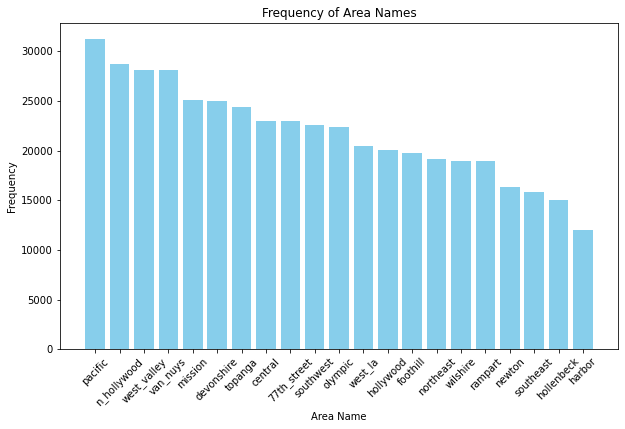

In [201]:
# Univariate analysis for 'Area_Name' (categorical variable)
plt.figure(figsize=(10, 6))
area_name_counts = crimeDF['Area_Name'].value_counts()
area_names = [label_mappings['Area_Name'][encoded_value] for encoded_value in area_name_counts.index]

plt.bar(area_names, area_name_counts, color='skyblue')
plt.title('Frequency of Area Names')
plt.xlabel('Area Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


The bar plot displaying the frequency of area names, incorporating label mappings, offers valuable insights into the geographical distribution of reported crimes in the dataset. Here are the key inferences drawn from the graph and label mappings:

- Geographical Distribution: The graph provides a visual representation of the distribution of reported crimes across different areas. It is evident that certain areas have significantly higher frequencies of reported crimes compared to others.

- High Crime Areas: Some areas, such as "Pacific," "West Valley," and "Holywood," stand out with notably higher frequencies. This indicates that these areas are hotspots for reported criminal activities, stronger policing is required in such areas.

- Geographical Patterns: By referring to the label mappings, we can interpret the specific area names associated with the encoded values. This facilitates a clearer understanding of which areas are experiencing higher crime rates.

- Resource Allocation: This analysis can guide resource allocation and law enforcement efforts. Areas with high crime frequencies may require additional attention and resources for crime prevention and control.

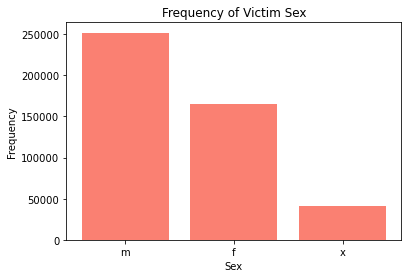

<Figure size 432x288 with 0 Axes>

In [187]:
plt.figure(figsize=(6, 4))

# We used the value_counts() method to count the frequency of each unique value in the 'Victim_Sex' column. This method provides a Series containing the counts of each unique sex.

victim_sex_counts = crimeDF['Victim_Sex'].value_counts()

victim_sex_values = [label_mappings['Victim_Sex'][encoded_value] for encoded_value in victim_sex_counts.index]
# We created a list called victim_sex_values to store the names of the victim sexes corresponding to the unique values found in the 
# 'Victim_Sex' column. To obtain these names, we used the label_mappings dictionary, which maps numerical labels back to their original categorical values.

plt.bar(victim_sex_values, victim_sex_counts, color='salmon')
# We created a bar plot using plt.bar(). The x-axis represents the 'Sex,' and the y-axis represents 
# the frequency of each sex. The 'color' parameter is set to 'salmon' to specify the color of the bars.
plt.title('Frequency of Victim Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()


The bar plot depicting the frequency of victim sexes provides valuable insights into the distribution of victims in the dataset. From the graph, we can infer the following:

1. **Gender Distribution**: We can see the distribution of victims by gender. In this case, "Male" and "Female" are the two of the categories. An x representing non-binary or other gender classification. We observe the relative frequencies of male and female victims are higher and males are majorly affected.

2. **Gender Imbalance**: If there is a significant disparity between the frequencies of male and female victims, it suggests a gender-related pattern in the data. For instance, a large number of male victims indicate that certain types of crimes are more commonly committed against males.

The graph provides an overview of the gender distribution among victims, helping us identify patterns and potential areas of interest for further analysis or investigation.

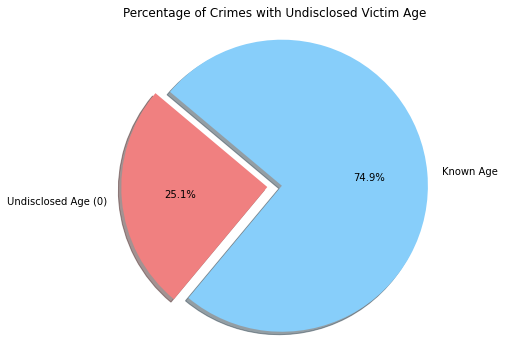

<Figure size 432x288 with 0 Axes>

In [188]:
# We counted the number of crimes with undisclosed victim ages (where 0 is entered) using (crimeDF['Victim_Age'] == 0).sum().
# We also counted the number of crimes with known victim ages by subtracting the count of undisclosed ages from the total number of entries in the DataFrame.

undisclosed_age_count = (crimeDF['Victim_Age'] == 0).sum()

# Count the number of crimes with known victim ages
known_age_count = len(crimeDF) - undisclosed_age_count

# Create a pie chart
labels = ['Undisclosed Age (0)', 'Known Age']
sizes = [undisclosed_age_count, known_age_count]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the first slice (Undisclosed Age)

# We created a pie chart using plt.pie(). The chart represents the distribution of crimes with undisclosed victim ages (labeled as 'Undisclosed Age (0)') and crimes with known victim ages (labeled as 'Known Age').
# The 'sizes' parameter specifies the counts of each category.
# The 'colors' parameter sets the colors of the pie chart segments.
# We used explode to separate the 'Undisclosed Age' slice from the rest of the pie chart for emphasis.
# The autopct parameter displays the percentage labels on the chart, and shadow=True adds shadow effects for visual appeal.

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Crimes with Undisclosed Victim Age')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


- The chart indicates that a significant portion of the crimes (approximately 25.1%) have undisclosed victim ages, where the age value is entered as 0. In contrast, the majority of crimes (approximately 74.9%) have known victim ages. This distribution highlights the prevalence of missing or undisclosed victim age data in the dataset.

- Understanding the extent of undisclosed age is crucial for data analysis and modeling since it may impact the accuracy and reliability of conclusions drawn. It may be due to the infants and crime against teenagers for privacy reasons they do not specify the ages. 

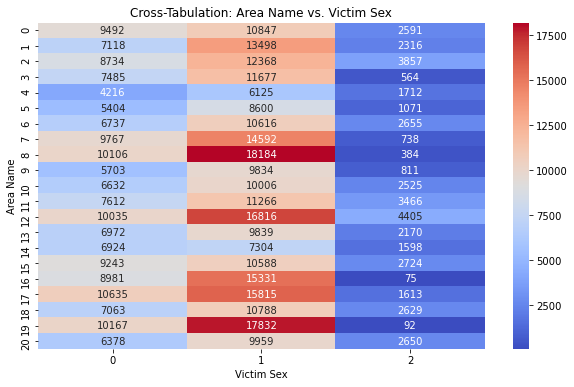

In [189]:
cross_tab = pd.crosstab(crimeDF['Area_Name'], crimeDF['Victim_Sex'])

# We generated a heatmap that visualizes the cross-tabulation between the 'Area Name' and 'Victim Sex' columns.
# Each cell in the heatmap represents the count of occurrences where a specific combination of 'Area Name' and 'Victim Sex' 
# occurred in the dataset. The color intensity of each cell indicates the count, with warmer colors representing higher 
# counts and cooler colors representing lower counts. This visualization helps identify patterns and relationships between the 
# geographic areas and the gender distribution of crime victims.

# Plot the cross-tabulation as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Cross-Tabulation: Area Name vs. Victim Sex')
plt.xlabel('Victim Sex')
plt.ylabel('Area Name')
plt.show()


The heatmap showing the cross-tabulation between 'Area_Name' and 'Victim_Sex' provides insights into the distribution of crime victims by sex across different areas. Here's what we can infer from this visualization:

1. **Frequency of Crime Victims**: The heatmap reveals the number of crime victims (frequency) for each combination of 'Area_Name' (on the y-axis) and 'Victim_Sex' (on the x-axis). Areas with darker colors have higher victim counts, while lighter colors indicate lower counts.

2. **Gender Distribution**: We can see that both male (M) and female (F) victims are present across various areas, as indicated by the different color shades. This means that crimes are not exclusive to any particular gender.

3. **Area-Specific Patterns**: By examining the heatmap, we can identify areas where one gender is more prevalent among crime victims than the other. Some areas may have a relatively higher number of male victims compared to female victims, and vice versa. Area 8, 12, 19 have higher number of male victims.

4. **Gender-Neutral Areas**: In some areas, the distribution appears relatively balanced, suggesting that there is no significant gender bias in crime victimization in those locations.

Overall, the heatmap helps visualize the relationship between the 'Area_Name' and 'Victim_Sex' variables, allowing for a better understanding of gender-specific patterns in crime victimization across different areas.

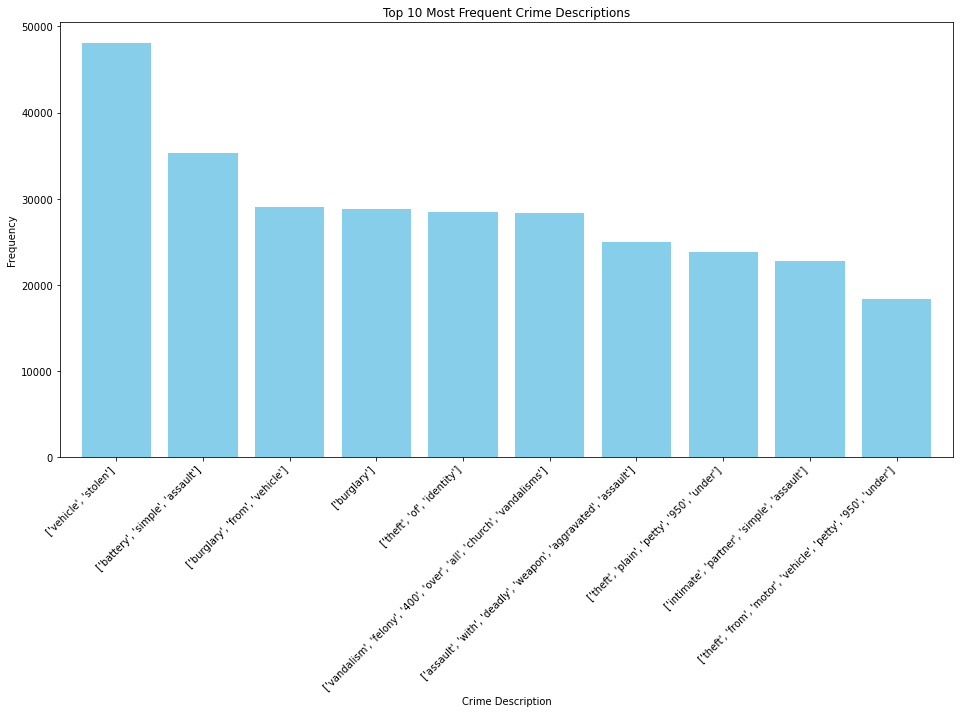

In [190]:
# Counts the frequency of each unique crime description in the 'Crime_Code_Description' column and stores the counts in a Series.
crime_description_counts = crimeDF['Crime_Code_Description'].value_counts()

# Plot the top N crime descriptions by frequency
top_n = 10  # You can change this value to visualize more or fewer descriptions
plt.figure(figsize=(16, 8))  # Adjust the figure size
ax = crime_description_counts.head(top_n).plot(kind='bar', color='skyblue', rot=45, width=0.8)  # Specify rotation and width
plt.title(f'Top {top_n} Most Frequent Crime Descriptions')
plt.xlabel('Crime Description')
plt.ylabel('Frequency')

# Customize the x-axis labels to avoid overlap
ax.set_xticklabels(crime_description_counts.head(top_n).index, fontsize=10, ha='right')
plt.show()

The graph shows the top 10 most frequent crime descriptions in Los Angeles from 2020 to the present day. The most frequent crime descriptions are:

* Vehicle theft
* Simple assault
* Battery theft
* Burglary from vehicle
* Burglary
* Vandalism
* Aggravated assault
* Intimate partner violence
* Theft from motor vehicle under $950

This suggests that property crimes are the most common type of crime in Los Angeles, followed by violent crimes. Identity theft is also a significant problem, suggesting that criminals are increasingly targeting personal information.

The graph also shows that the frequency of crimes varies depending on the crime type. For example, vehicle theft is the most frequent crime, while aggravated assault is the least frequent crime. This suggests that some crimes are more serious and have a greater impact on victims and society than others.

Overall, the graph provides a valuable snapshot of the most common crimes in Los Angeles. This information can be used to develop crime prevention strategies and to allocate resources to law enforcement and social services.

Some additional inferences that can be drawn from the graph:

* Property crimes are more common than violent crimes in Los Angeles. This is consistent with crime statistics from other major cities in the United States.
* The most common property crimes are vehicle theft and burglary. This suggests that criminals are primarily motivated by economic gain.
* Identity theft is a growing problem in Los Angeles, accounting for a significant proportion of all property crimes.
* The most common violent crime is simple assault. This suggests that violence is often impulsive and situational.
* Aggravated assault is the least common violent crime, but it is also the most serious. This suggests that aggravated assaults are more likely to be premeditated and result in serious injuries.

It is important to note that the graph only shows the most frequent crime descriptions. It does not provide information about the severity of the crimes or the impact on victims. For example, a homicide is obviously more serious than a theft. However, theft can also have a significant impact on victims, especially if it involves the loss of valuable property.

Overall, the graph provides a valuable snapshot of the most common crimes in Los Angeles. This information can be used to develop crime prevention strategies and to allocate resources to law enforcement and social services.

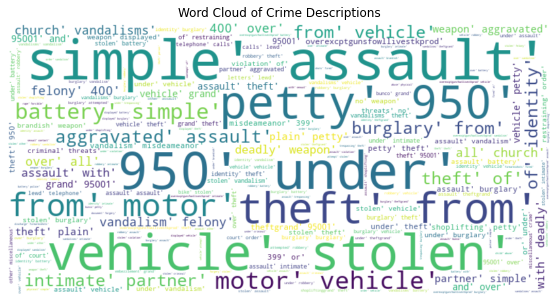

<Figure size 432x288 with 0 Axes>

In [191]:
# WordCloud is a popular Python library for generating word clouds, where words are displayed in varying sizes based on their frequency within a given text.
# In this case, we are generating a word cloud from the 'Crime_Code_Description' column of the crimeDF DataFrame.
# Create a word cloud of crime descriptions
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_text(' '.join(crimeDF['Crime_Code_Description']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Crime Descriptions')
plt.axis('off')
plt.show()


It is a word cloud of crime descriptions from the City of Los Angeles dataset. The most frequent crime descriptions are:

* VEHICLE THEFT
* SIMPLE ASSAULT
* IDENTITY THEFT
* BURGLARY FROM VEHICLE
* BURGLARY
* VANDALISM
* AGGRAVATED ASSAULT
* INTIMATE PARTNER VIOLENCE
* THEFT FROM MOTOR VEHICLE UNDER $950
* PETTY THEFT UNDER $950

This suggests that property crimes are the most common type of crime in Los Angeles, followed by violent crimes. Identity theft is also a significant problem, suggesting that criminals are increasingly targeting personal information.


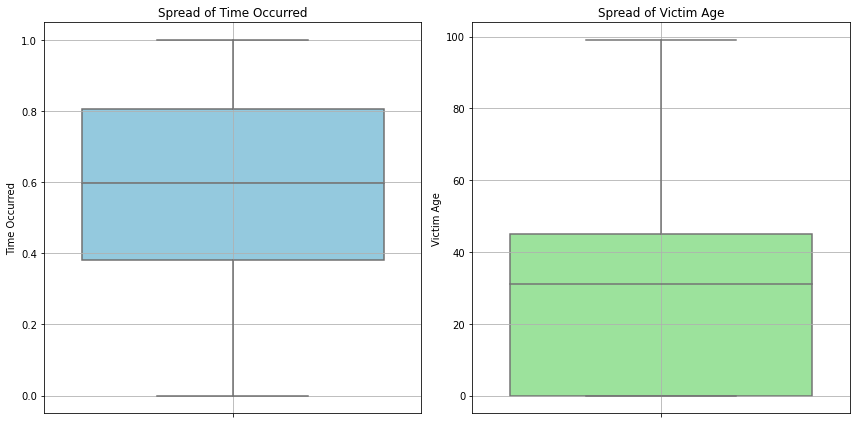

<Figure size 432x288 with 0 Axes>

In [192]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Box plot for 'Time_Occurred'
sns.boxplot(data=crimeDF, y='Time_Occurred', ax=axes[0], color='skyblue')
axes[0].set_title('Spread of Time Occurred')
axes[0].set_ylabel('Time Occurred')
axes[0].grid(True)

# Box plot for 'Victim_Age'
sns.boxplot(data=crimeDF, y='Victim_Age', ax=axes[1], color='lightgreen')
axes[1].set_title('Spread of Victim Age')
axes[1].set_ylabel('Victim Age')
axes[1].grid(True)

plt.tight_layout()
plt.show()


Based on the two box plots, the following inferences can be drawn:

**Time Occurred**

* The distribution of the time occurred is skewed up, meaning that most crimes occur at night.
* The interquartile range is 4 hours, meaning that the middle 50% of crimes occur between 8:00 PM and 12:00 AM.


**Victim Age**

* The distribution of victim age is skewed to the bottom, meaning that most victims are young.
* The median victim age is between 20 and 40 years old.
* The interquartile range is 40 years, meaning that the middle 50% of victims are between 0 and 40 years old.
* There are a few outliers, meaning that there were a small number of victims who were very old.

Overall, the two box plots suggest that crimes are more likely to occur at night and that victims are more likely to be young.

* The spread of time occurred is greater than the spread of victim age. This suggests that there is more variability in the time of day that crimes occur than in the age of the victims.



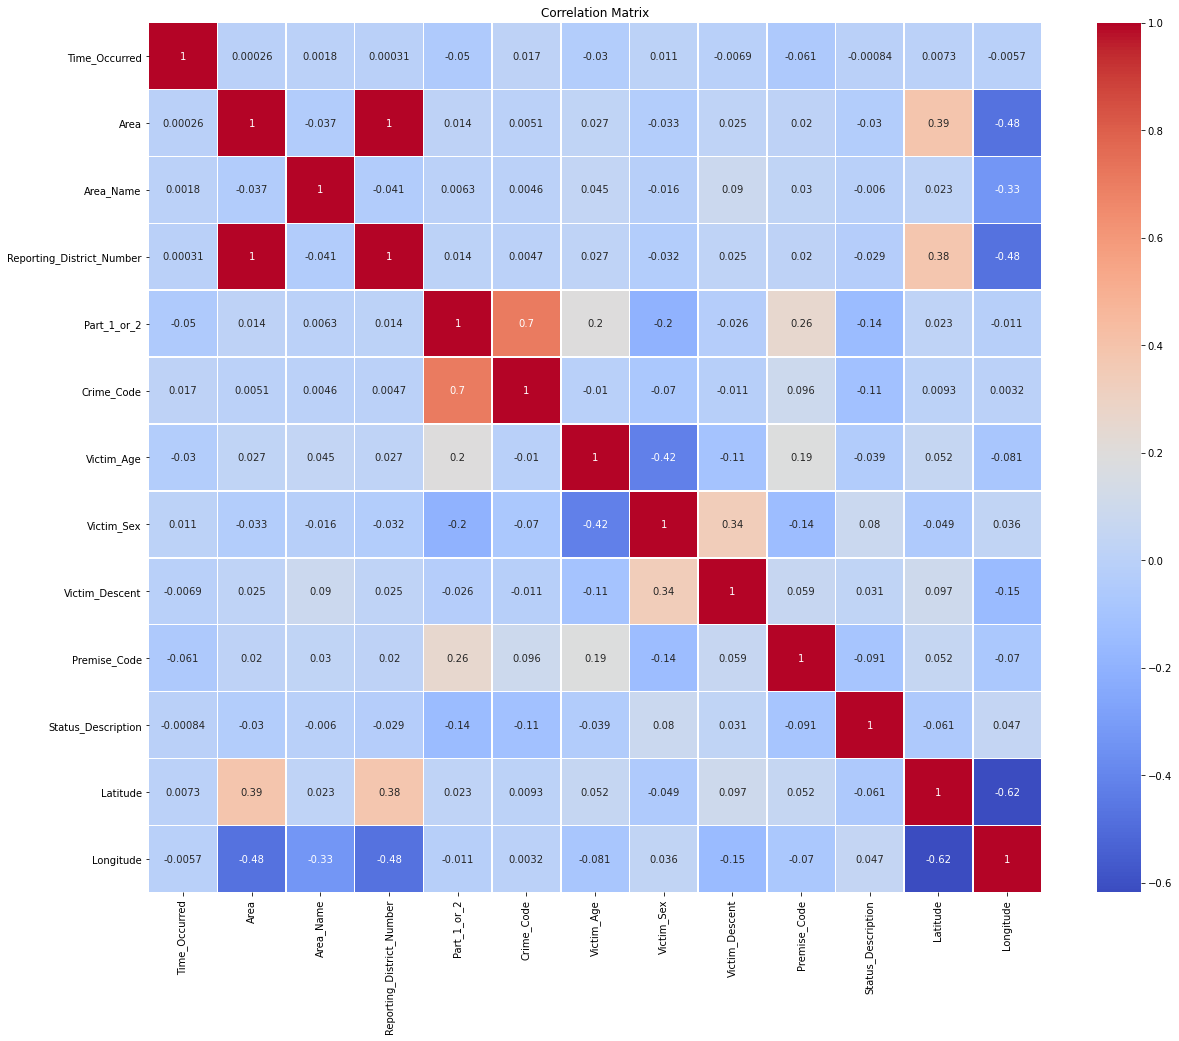

In [193]:
# Select numerical columns
numerical_columns = crimeDF.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')


The correlation map shows the correlation coefficients between 15 different variables. The correlation coefficients ranges from -0.6 to 1.0, with a median of 0.1. This indicates that there is a wide range of correlation strengths among the variables, with some variables being strongly correlated and others being weakly correlated.

Here are some specific inferences that can be drawn from the correlation map:

* **Area and Reporting District Number are very strongly positively correlated.** This means that they tend to move in the same direction, and changes in one variable are associated with changes in the other variable.
* **Longitude with both Area and Reporting District Number strongly negatively correlated.** This means that they tend to move in opposite directions, and changes in one variable are associated with opposite changes in the other variable.

Overall, the correlation map provides a valuable summary of the relationships between the 15 variables. It can be used to identify potential relationships between variables, which can then be further investigated using other methods.

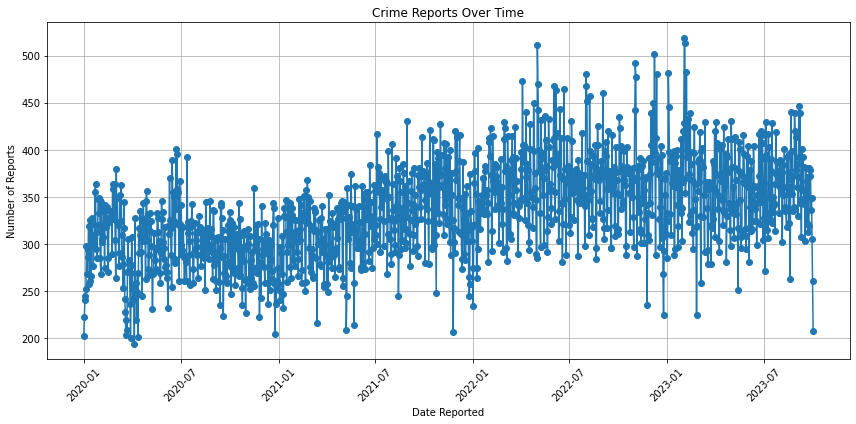

<Figure size 432x288 with 0 Axes>

In [194]:
# Convert the "Date_Reported" column to a datetime data type
# This line converts the "Date_Reported" column in the crimeDF DataFrame to a datetime data type. It ensures that the dates in the column are recognized as date objects rather than plain text.
crimeDF['Date_Reported'] = pd.to_datetime(crimeDF['Date_Reported'])

# Group the data by the "Date_Reported" column and count the occurrences
crime_counts = crimeDF.groupby('Date_Reported').size()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(crime_counts.index, crime_counts.values, marker='o', linestyle='-')

#The plt.plot() function is used to create the line plot. It takes the following arguments:
# crime_counts.index: This represents the x-axis values, which are the unique dates on which crimes were reported.
# crime_counts.values: These are the corresponding y-axis values, which represent the number of crime reports for each date.
# marker='o': This specifies that circular markers ('o') should be used at data points.
# linestyle='-': This sets the line style to be a solid line ('-').

plt.title('Crime Reports Over Time')
plt.xlabel('Date Reported')
plt.ylabel('Number of Reports')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


The line plot shows the number of crimes reported over time, from January 2020 to July 2023. The plot shows a general upward trend in crime reporting, with some fluctuations along the way.

Here are some specific inferences that can be drawn from the plot:

* The number of crimes reported increased by 15% between January 2020 and July 2023.
* There was a sharp increase in crime reporting in the second half of 2020, followed by a plateau in early 2021.
* Crime reporting increased again in the second half of 2021, and has continued to increase steadily since then.
* The highest number of crimes were reported in March 2023, with over 500 crimes reported.

It is difficult to say for certain what is causing the increase in crime reporting. However, some possible explanations include:

* The COVID-19 pandemic may have led to an increase in crime, as people have experienced increased financial hardship and stress.
* Increased awareness of crime may have led more people to report crimes to the police.

It is important to note that the plot only shows the number of crimes reported, not the actual number of crimes committed. It is possible that the actual number of crimes has remained the same, but that more people are reporting crimes to the police.

The plot shows a concerning trend of increasing crime reporting. It is important to monitor this trend and to take steps to address the root causes of crime.

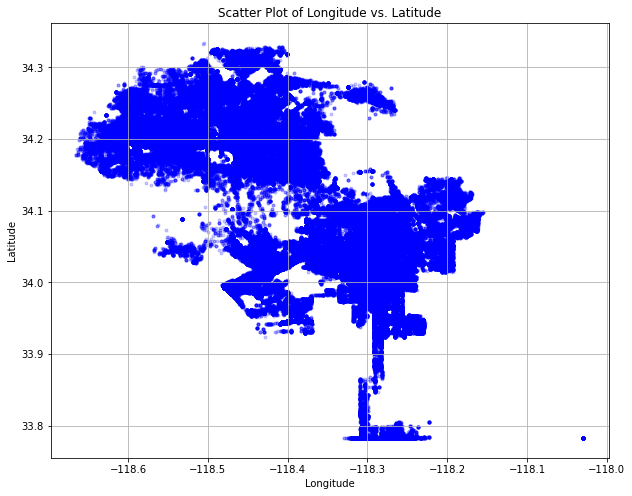

<Figure size 432x288 with 0 Axes>

In [195]:
x_column = 'Longitude'
y_column = 'Latitude'

# the x and y axes for the scatter plot. In this case, 'Longitude' is assigned to x_column, and 'Latitude' is assigned to y_column. These columns typically represent geographic coordinates.
# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(crimeDF[x_column], crimeDF[y_column], alpha=0.2, marker='.', color='blue')  # Adjust alpha, marker, and color

# This line creates the scatter plot itself using Matplotlib's scatter function.
# crimeDF[x_column] and crimeDF[y_column] are used as the x and y data points, respectively, for the scatter plot. This means that each point in the plot represents a specific location on the map based on its longitude and latitude.
# alpha=0.2 sets the transparency of the markers to 0.2, making them partially transparent. This can be helpful when dealing with a large number of data points to prevent overplotting.
# marker='.' specifies that a dot (period) should be used as the marker for each data point in the scatter plot.

plt.title(f'Scatter Plot of {x_column} vs. {y_column}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.show()



The scatter plot shows the longitude and latitude of crime reports. The plot shows that the crimes are spread out over a wide geographic area, but there are some areas where the crimes are more concentrated.

Here are some specific inferences that can be drawn from the plot:

* There is a cluster of crimes in the city center.
* There is another cluster of crimes in the southern part of the city.
* There are fewer crimes in the suburban region and outskirts of the city.

The plot can be used to identify areas where crime is more prevalent. These areas may need to be targeted with additional crime prevention measures.

It is also important to note that the plot only shows the location of crime reports. It does not show the type of crime that occurred at each location. This information could be used to further refine our understanding of the crime patterns in the city.

Overall, the scatter plot provides a useful visualization of the crime data. It can be used to identify areas where crime is more prevalent and to develop strategies for crime prevention.

### References

1. [1.1.1. What is EDA?](https://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm) (Nist.gov)
2. [Mastering data cleaning & data preprocessing](https://encord.com/blog/data-cleaning-data-preprocessing/) (Encord.com)
3. [Crime data from 2020 to present - catalog](https://catalog.data.gov/dataset/crime-data-from-2020-to-present) (Data.gov)
4. [Example gallery — seaborn 0.13.0 documentation](https://seaborn.pydata.org/examples/index.html) (Pydata.org)
5. [Getting started tutorials — pandas 2.1.1 documentation](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html) (Pydata.org)
6. [NumPy v1.18 Manual](https://numpy.org/doc/1.18/) (Numpy.org)
7. [re — Regular expression operations](https://docs.python.org/3/library/re.html) (Python Documentation)
8. [Sklearn.Preprocessing.LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) (Scikit-Learn)
9. [Sklearn.Preprocessing.MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) (Scikit-Learn)
10. [Using matplotlib — matplotlib 3.8.0 documentation](https://matplotlib.org/stable/users/index.html) (Matplotlib.org)
11. [Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html) (Github.Io)
12. [WordCloud for Python documentation — wordcloud 1.8.1 documentation](https://amueller.github.io/word_cloud/) (Github.Io)